# 선형회귀

In [1]:
import numpy as np
import pandas as pd

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
kn = KNeighborsRegressor(n_neighbors=3)

In [6]:
train_data = perch_length.reshape(-1, 1)

In [10]:
kn.fit(train_data, perch_weight)

KNeighborsRegressor(n_neighbors=3)

In [11]:
kn.score(train_data, perch_weight)

0.9803460206994964

In [13]:
distance, indexes = kn.kneighbors([[50]])

In [14]:
perch_weight[indexes]

array([[1000., 1000., 1000.]])

### 시각화를 통해 학습한 데이터와 실제 데이터

In [15]:
import matplotlib.pyplot as plt

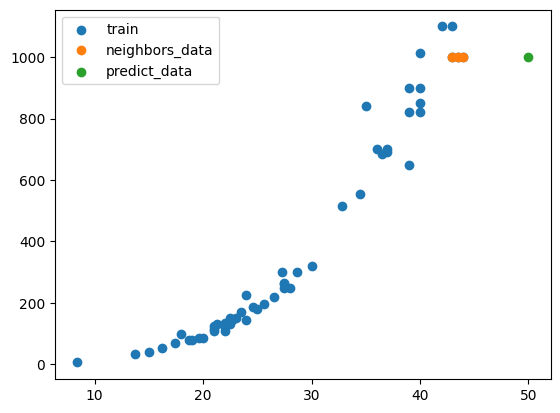

In [16]:
plt.scatter(perch_length, perch_weight, label='train')
plt.scatter(perch_length[indexes], perch_weight[indexes], label='neighbors_data')
plt.scatter(50, 1000, label='predict_data')
plt.legend()

### 길이가 100일때 무게

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data, perch_weight)
print(lr.predict([[100]]))
print(lr.coef_, lr.intercept_)

[3045.76003854]
[36.93837597] -648.0775582457385


# 선형회귀
    선형의 방정식을 구하는 알고리즘
    실제값과 구한 직선의 방정식들의 오차가 최소가 되는 식을 구한다
    y = ax + b

In [19]:
lr.predict([[5]]), lr.predict([[50]])

(array([-463.38567841]), array([1198.84124015]))

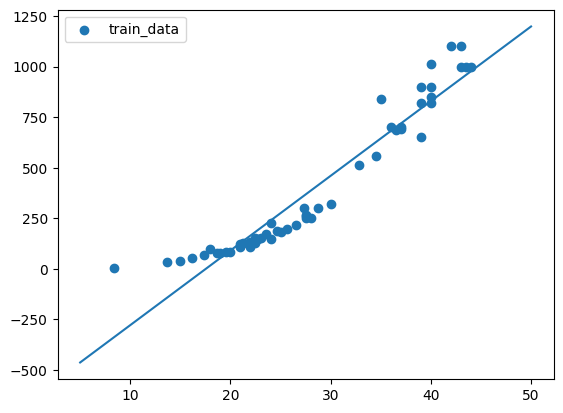

In [21]:
plt.scatter(perch_length, perch_weight, label='train_data')
plt.plot([5, 50], [-463.38567841, 1198.84124015])
plt.legend()
plt.legend()

# 단항식 -> 다항식
    y = ax^2 + bx + c
    패턴이나 기타 다른 수학적 또는 알고리즘의 변경없이 다항식으로 변환

In [25]:
train_poly = np.column_stack((train_data ** 2, train_data))

In [26]:
lr = LinearRegression()
lr.fit(train_poly, perch_weight)

LinearRegression()

In [27]:
lr.coef_, lr.intercept_

(array([  1.02094922, -22.4189282 ]), 131.6453196989595)

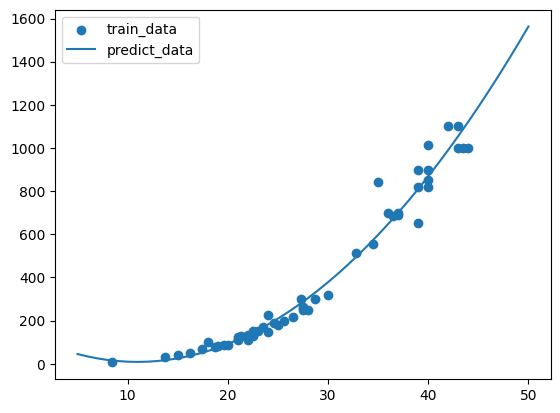

In [28]:
point = np.arange(5, 51)
point_poly = np.column_stack((point**2, point))
point_poly_predict = lr.predict(point_poly)
plt.scatter(perch_length, perch_weight, label='train_data')
plt.plot(point, point_poly_predict, label='predict_data')
plt.legend()

# 과적합 확인
    훈련용과 학습용 데이터 분리해서 다항식으로 만들어서 score를 확인 후 과적합 유무 판단

# 데이터 분리
# 1. 파이썬 문법 이용
# 2. sklearn에서 제공하는 메소드 이용

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(train_poly, perch_weight, train_size=0.3, random_state=0)

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9752964064164267
0.9508937871530174


# 다항회귀: 한개의 특성을 이용해 2차원으로 만든 선형회귀
# 다중회귀: 여러개의 특성(컬럼)을 사용한 선형회귀
    특성공학: 기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/perch.csv')

In [44]:
x_train,x_test,y_train,y_test = train_test_split(df, perch_weight, test_size=0.3, random_state=42)

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.9537065271284176, 0.8863420836347778)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
train_poly.shape, test_poly.shape

((39, 9), (17, 9))

In [48]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [49]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [50]:
lr.score(train_poly, y_train), lr.score(test_poly, y_test)

(0.9898271546307027, 0.9713771600629659)

# 다중회귀

In [51]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape, test_poly.shape, len(df))
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train), lr.score(test_poly,y_test))

(39, 55) (17, 55) 56
0.9999999999999992 -20.19503857729437


In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 규제적용전 표준화
# 규제: 과도한 학습이 안되게 수치를 임의로 조정
    릿지 vs 라쏘
    릿지: 선형회귀에서 규제를 적용한 머신러닝 계수를 제곱한 값을 이용해서 규제
    라쏘: 선형회귀에서 규제를 적용한 머신러닝 계수를 절대값을 이용해서 규제

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train), ridge.score(test_scaled, y_test))

0.9889900259477936 0.9806943210368352


### 과적합이 발생하면 기존에는 모델을 더 복잡하게 하거나, 다른 방법 다중 -> 다항 특성 좀 더 찾는 행위
### 규제 알고리즘을 적용해서 최종적으로 해결을 시도